# <span style="color:blue"> Laboratorio 12 - Deep & Convolutional Neural Network image recognition</span>

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

## MNIST with Keras
L'obbiettivo del *Laboratorio 12* è di utilizzare una ***DNN*** o una ***CNN***, implementata mediante il pacchetto ***Keras*** di python, per svolgere una **classification task**:  distinguere e quindi classificare, a partire da un'immagine, una delle 10 cifre scritte a mano.

Il **dataset MINST** comprende $70000$ cifre scritte a mano, ciascuna in forma di una griglia di $28\times 28$ pixel. Ogni pixel può assumere $256$ gradazioni del colore *grigio*, interpolate tra il *bianco* e il *nero* $\rightarrow$ ogni pixel nella griglia assumerà un valore compreso tra $[0,255]$.


Elenco di seguito i passaggi che devono essere svolti per fare il *training* della *rete neurale*:
1. **Load and Process the Data**:  mediante la classe `load_data()`è possibile caricare sia i dati di *training* che di *test* dalla libreria *MINST*. I dati sono poi messi nella shape corretta.

2. **Define the Neural Network and its Architecture**, bisogna solamamente assicurarsi che il *primo* layer abbia fissato `input_shape=(28*28,)` e che l' output dell' *ultimo* layer sia $10$.

3. **Choose the Optimizer and the Cost Function**: per problemi di classificazione si è soliti usare la funzione di *loss*  `categorical_crossentropy`, come *optimiser* è usato  `SGD`. 
4. **Model training**
5. **Evaluation of the Model Performance on the *Unseen* Test Data**


***osservazione***: per task di categorizzazione è molto importante studiare l'**accuratezza**.

Per una spiegazione più completa, vedi `LSN_Exercises_12`.

## Exercise 12.1
A partire dal codice fornito  in `LSN_Exercises_12`, ho cercato di migliorarne le **performance** modificando $N_{epochs}$ e *l'ottimizzatore*

### 1. Load and Process the Data


In [13]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [14]:
#====== Uploading del dataset Minst =======
#==========================================
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


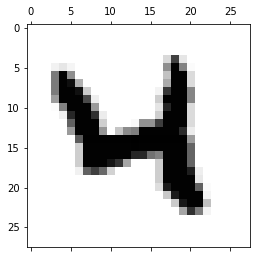

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [15]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

### 2. Define the Neural Net and its Architecture

La scelta di `Softmax` in uscita è stata fatta per assicurarsi un risultato più netto possibile.

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout    #drop out spegne a caso i vari neuroni per aiutare la rete a generalizzare

#===== Costruzione della DNN =======
#===================================
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


### 3. Choose the Optimizer and the Cost Function

In [17]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

optimizer = [SGD(),Adam(),Nadam(),RMSprop(),Adagrad()]
optimizer_label = ['sgd','adam','nadam','RMSprop','adagrad']

def compile_model(i):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer[i],
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


### 4. Model training e 5. Model performance on *Test data*

Studio ora l'**accuratezza** e il valore della funzione di **loss**, sui dati di train e di test, per diversi *ottimizzatori*. 

313/313 [==============================] - 1s 2ms/step - loss: 0.1627 - acc: 0.9527


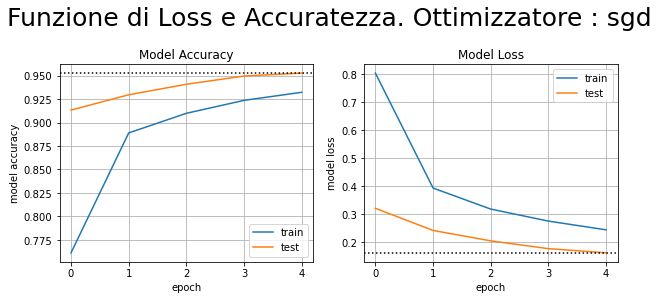


Test loss: 0.16268135607242584
Test accuracy: 0.9527000188827515
313/313 [==============================] - 1s 2ms/step


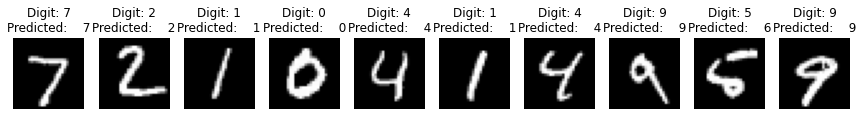

313/313 [==============================] - 1s 3ms/step - loss: 0.0807 - acc: 0.9781


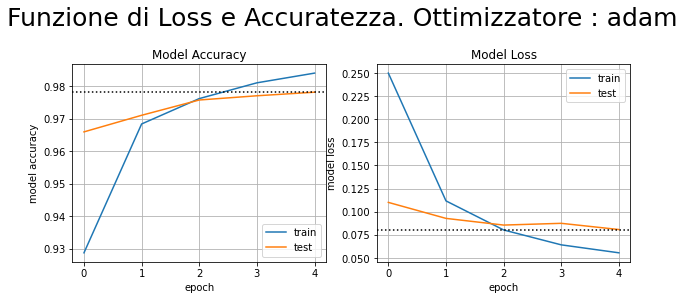


Test loss: 0.08070524781942368
Test accuracy: 0.9781000018119812
313/313 [==============================] - 1s 2ms/step


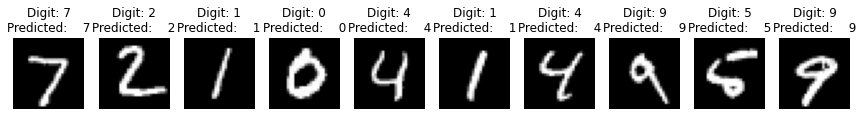

313/313 [==============================] - 1s 3ms/step - loss: 0.0851 - acc: 0.9796


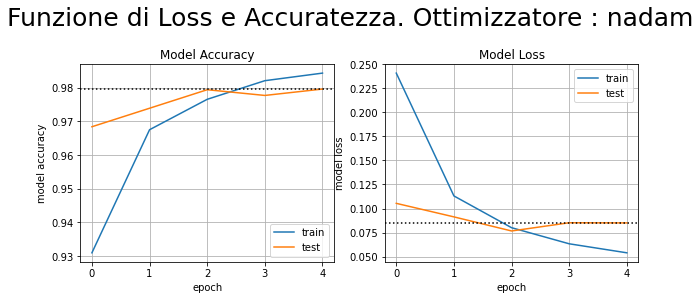


Test loss: 0.08505971729755402
Test accuracy: 0.9796000123023987
313/313 [==============================] - 1s 2ms/step


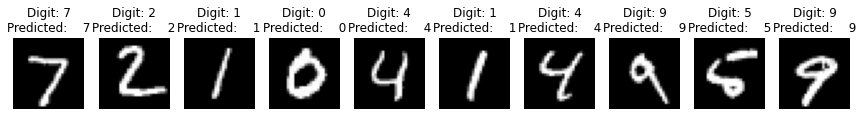

313/313 [==============================] - 1s 2ms/step - loss: 0.1453 - acc: 0.9753


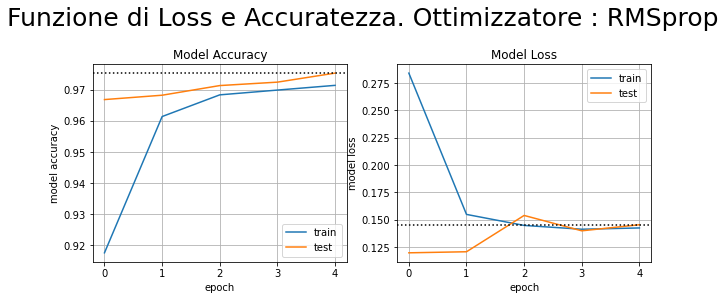


Test loss: 0.14529725909233093
Test accuracy: 0.9753000140190125
313/313 [==============================] - 1s 2ms/step


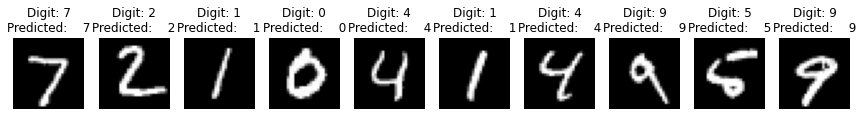

313/313 [==============================] - 1s 3ms/step - loss: 0.3185 - acc: 0.9155


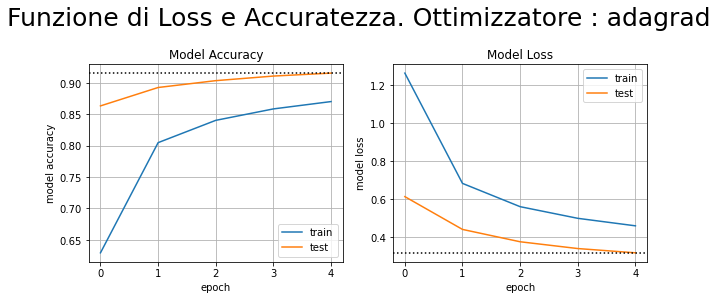


Test loss: 0.3185148537158966
Test accuracy: 0.9154999852180481
313/313 [==============================] - 1s 2ms/step


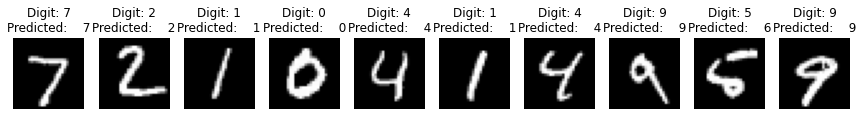

In [24]:
batch_size = 32
epochs = 5

for i in range(0,5):
    # create the deep neural net
    model_DNN = compile_model(i)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)

    # look into training history
    plt.figure(figsize=(10,8))
    plt.suptitle("Funzione di Loss e Accuratezza. Ottimizzatore : "+optimizer_label[i], fontsize = 25)
        
    # summarize history for accuracy
    plt.subplot(2,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.axhline(y =history.history['val_acc'][-1], color = 'black',linestyle = ":")
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title("Model Accuracy")
    plt.grid()

    # summarize history for loss
    plt.subplot(2,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.axhline(y = history.history['val_loss'][-1], color = 'black',linestyle = ":")
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title("Model Loss")
    plt.grid()
    
    plt.show()
    
    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    #prediction sui dati di test
    predictions = model_DNN.predict(X_test)
    X_test_img = X_test
    X_test_img = X_test_img.reshape(X_test_img.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test_img[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    

### Osservazioni sui risultati ottenuti

***osservazione generale*** : il layer di *dropout* spegne alcuni neuroni, redendo più difficile l' apprendimento sui dati di *training* ma evita che la rete neurale faccia *overfitting*; il processo viene fatto a spese dell' accuratezza durante la fase di **training**. Durante la fase di **test**, il *Dropout* viene disattivato in automatico permettendo alla rete neurale di usare tutti i neuroni; il processo assicura una migliore accuratezza sui dati di *test*.

Di seguito sono esposte le mie considerazioni circa gli **ottimizzatori** utilizzati ( ricordando che $N_{epochs}$ = 5):
1. **SGD** : L' accuratezza e la Loss sono molto diverse nella due fasi di *training* e *test*, ipotizzo che subisca molto l' effetto del *dropout*. La convergenza delle funzioni è buona ma non ottima ( i valori di loss e accuratezza non sono soddisfacenti a pieno; potrebbe essre migliorata aumentando il $N_{epochs}$) e questo è rispecchiato anche nelle capacità predittive del programma: non è infatti in grado di classificare correttamente il numero $5$, il quale viene scambiato per un $6$. 

2. **Adam**: L'accuratezza è aumentata e la loss è dimunuita rispetto al caso predente. I valori sono soddisfacenti ,, infatti l'accuratezza è superiore a $0.97$ e la loss è inferiore a $0.1$.  Siccome le funzioni relativi al *training* sono migliori rispetto a quelle dei *test* ipotizzo che si sia  verificato un *overfitting*. Le capacità predittive rimangono comunque migliori rispetto all' *SGD*.

3. **Nadam** : discorso analogo all' *adam*.

4. **RSProp** : Sebbene l' accuratezza sia buona ( $>0.97$) la  loss ha un comportamento strano : tende a aumentare per i dati di *test*.Nonostante il valore della *loss* suggeriscano che la fase di training non è stata svolta nel modo corretto( siccome la *loss_val* aumenta),le capacità predittive del modello sono comunque buone.

5. **Adagrad** : è il peggiore ottimizzatore tra quelli visti, con *accuratezza* $< 0.92$ e *loss* $>0.30$. Il modello non è infatti in grado di classificare correttamente il numero $5$, il quale viene scambiato per un $6$.



Gli ottimizzatori migliori per il task, date $N_{epochs}=5$, sono $Adam$ e $Nadam$.

## Exercise 12.2
 Ho cambiato l' architettura della ***DNN*** per creare dei layer **convoluzionali**; questo è stato fatto per sfruttare l' invarianza traslazionale dei dati di input. Sono stati utilizzati ` 8`  layers differenti. 
 
 Rispetto all'esercizio precedente sono stati aggiunti due tipologie di layer:
 - `Conv2D` : layer convoluzionale. Il layer sarà creato con 10 / 16 filtri di formato $5x5$.
 - `MaxPooling2D` : sostituisce una regione di neuroni con un singolo neurone il cui output è data dal valore massimo di tutti gli output in quella regione.
 - `Flatten` : appiattisce l' input, facendolo passare da una shape 2D a una monodimensionale.

In [32]:
img_rows, img_cols = 28, 28 # input image dimensions (pixels) 
num_classes = 10 # output: 10 digits

# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Ho utilizzato 100 neuroni per il primo layer per migliorare l' accuratezza e loss. Per esempio, con solo *20* neuroni ottengo :

Test loss: 0.05878853797912598

Test accuracy: 0.9832000136375427

In [44]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
       
    model.add(MaxPooling2D(
        pool_size=(2, 2),
        strides=None,
        padding='valid',
        data_format=None))
    
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
        
    model.add(MaxPooling2D(
        pool_size=(2, 2),
        strides=None,
        padding='valid',
        data_format=None))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='relu'))
   
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['acc'])
    return model

Faccio il training della ***DNN*** e ne valutole performance.

In [45]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history2 = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2763 - acc: 0.9149 - val_loss: 0.0582 - val_acc: 0.9817
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0969 - acc: 0.9711 - val_loss: 0.0508 - val_acc: 0.9837
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0720 - acc: 0.9790 - val_loss: 0.0380 - val_acc: 0.9880
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0606 - acc: 0.9819 - val_loss: 0.0333 - val_acc: 0.9902
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0332 - acc: 0.9895

Test loss: 0.0332050658762455
Test accuracy: 0.9894999861717224


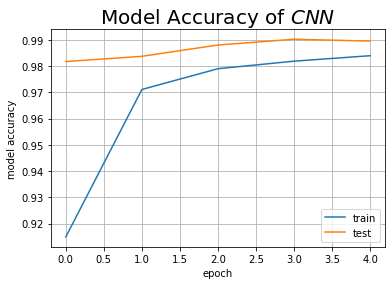

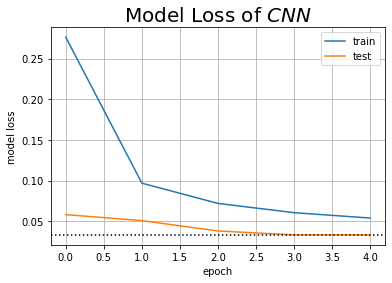


Test loss: 0.0332050658762455
Test accuracy: 0.9894999861717224
313/313 [==============================] - 1s 4ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

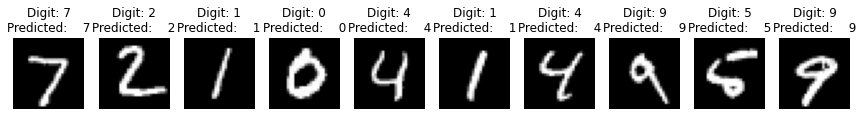

In [46]:
# look into training history

# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.ylabel('model accuracy')
plt.title("Model Accuracy of $CNN$",fontsize = 20)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.axhline(y = history2.history['val_loss'][-1], color = 'black',linestyle = ":")
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.title("Model Loss of $CNN$",fontsize = 20)
plt.axhline(y = history2.history['val_loss'][-1], color = 'black',linestyle = ":")
plt.grid()
plt.show()

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions2 = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions2[i])))    
    plt.axis('off') 
plt.show

I risultati ottenuti sono molto buoni, con una *accuratezza* $>0.98$ e una *loss* $<0.04$. Provo a raddoppiare il numero di **epoche** per vedere se è possibile ottenere una convergenza migliore.

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2914 - acc: 0.9106 - val_loss: 0.0740 - val_acc: 0.9773
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1072 - acc: 0.9686 - val_loss: 0.0480 - val_acc: 0.9848
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0786 - acc: 0.9769 - val_loss: 0.0415 - val_acc: 0.9862
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0652 - acc: 0.9806 - val_loss: 0.0353 - val_acc: 0.9889
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0592 - acc: 0.9829 - val_loss: 0.0293 - val_acc: 0.9906
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0509 - acc: 0.9846 - val_loss: 0.0300 - val_acc: 0.9905
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0448 - acc: 0.9864 - val_loss: 0.0315 - val_acc: 0.9906
Epoch 8/10
1875/1875 [==========================

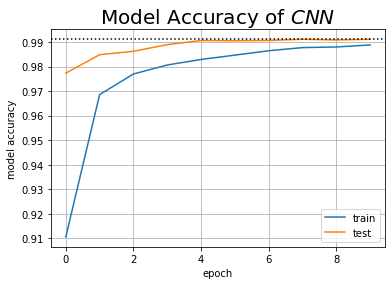

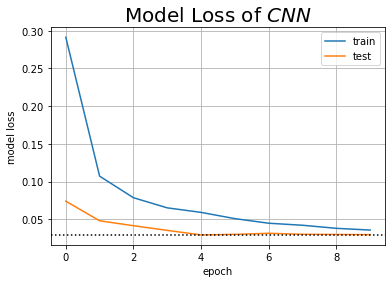


Test loss: 0.029637247323989868
Test accuracy: 0.991100013256073
313/313 [==============================] - 3s 11ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

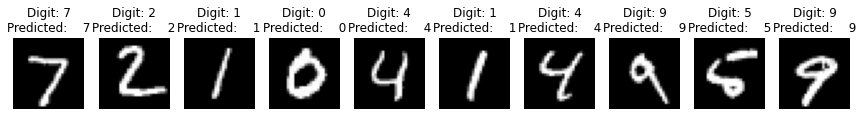

In [60]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN_3=create_CNN()

# train CNN
history3 = model_CNN_3.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score_3 = model_CNN_3.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.ylabel('model accuracy')
plt.title("Model Accuracy of $CNN$",fontsize = 20)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.axhline(y = history3.history['val_acc'][-1], color = 'black',linestyle = ":")
plt.grid()
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.title("Model Loss of $CNN$",fontsize = 20)
plt.axhline(y = history3.history['val_loss'][-1], color = 'black',linestyle = ":")
plt.grid()
plt.show()

# print performance
print()
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

predictions_3 = model_CNN_3.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions_3[i])))    
    plt.axis('off') 
plt.show

Come predetto, la convergenza è migliorata raddoppiando le epoche. 

Adopero la nuova rete neurale nell' esercizio successivo.

## Exercise 12.3
 Usando ` gimp`   ho creato 7 immagini scritte a mano e ho provato a predirne il valore usando la **CNN**. 
Use the `gimp` application to create 10 pictures of your "handwritten" 


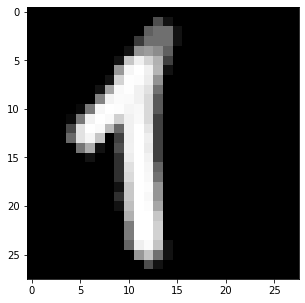

(28, 28)


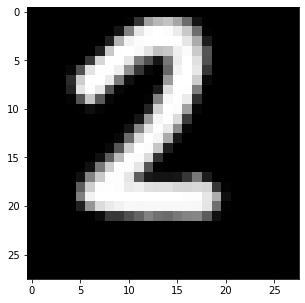

(28, 28)


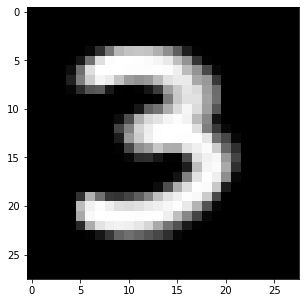

(28, 28)


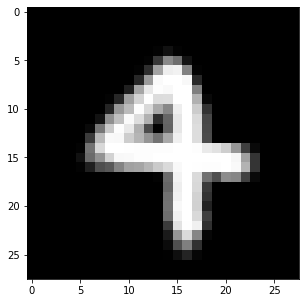

(28, 28)


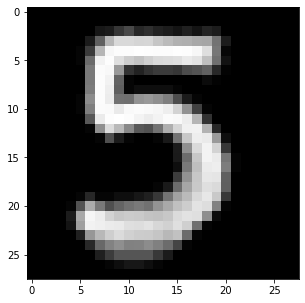

(28, 28)


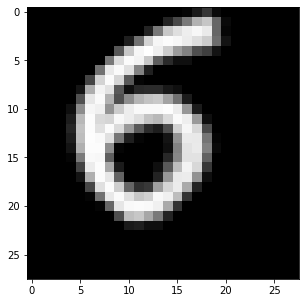

(28, 28)


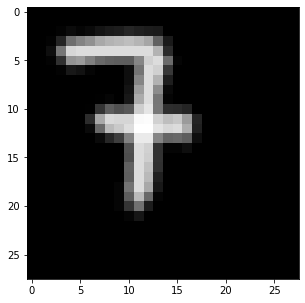

(28, 28)


In [61]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

digit_filenames = [ "numeri/1.png",
                    "numeri/2.png",
                    "numeri/3.png",
                    "numeri/4.png",
                    "numeri/5.png",
                    "numeri/6.png",
                    "numeri/7.png",]
img = []
i = 0
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
for digit_filenames in digit_filenames:
    digit_in = Image.open(digit_filenames).convert('L')
    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    img.append(data)
    
    plt.figure(figsize=(5,5))
    plt.imshow(data, cmap='gray')
    plt.show()
    print(data.shape)

Uso la rete DNN di cui ho fatto il traininng in precedenza, con $N_{epochs} = 10$.

In [64]:
predictions = [0,0,0,0,0,0,0,0,0,0]
for i in range (0,7):
    img[i] = img[i].reshape(1,xdim,ydim,1)
    predictions[i] =  model_CNN_3.predict(img[i])
    img[i] = img[i].reshape(xdim,ydim)

1/1 [==============================] - 0s 32ms/step


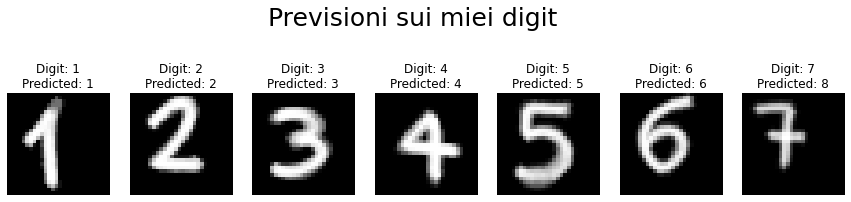

In [65]:
real_digit=["1","2","3","4","5","6","7"]
plt.figure(figsize=(15,4))
plt.suptitle("Previsioni sui miei digit", fontsize = 25)
for i in range(0,7):    
    ax = plt.subplot(1, 7, i + 1)    
    plt.imshow(img[i], cmap='gray')    
    plt.title("Digit: "+real_digit[i]+"\nPredicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

La previsione non è andata benissimo: ragione per cui non è stato in grado di identificare il $7$ sia il fatto che l' ho disegnato in maniera differente rispetto a quelli visti nel dataset MINST.

Concludo dicendo che quindi la mia rete neurale ha parzialmente fallito nel compito di generalizzare il dataset MINST.